<a href="https://colab.research.google.com/github/agarwalanant/DeepLearning/blob/master/RNN/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!wget http://www.superdatascience.com/wp-content/uploads/2017/03/Recurrent_Neural_Networks-1.zip
!unzip Recurrent_Neural_Networks-1.zip -d gdrive/My\ \Drive/DeepLearning

--2018-10-31 13:51:01--  http://www.superdatascience.com/wp-content/uploads/2017/03/Recurrent_Neural_Networks-1.zip
Resolving www.superdatascience.com (www.superdatascience.com)... 104.27.173.21, 104.27.172.21, 2606:4700:30::681b:ac15, ...
Connecting to www.superdatascience.com (www.superdatascience.com)|104.27.173.21|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.superdatascience.com/wp-content/uploads/2017/03/Recurrent_Neural_Networks-1.zip [following]
--2018-10-31 13:51:01--  https://www.superdatascience.com/wp-content/uploads/2017/03/Recurrent_Neural_Networks-1.zip
Connecting to www.superdatascience.com (www.superdatascience.com)|104.27.173.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24237 (24K) [application/zip]
Saving to: ‘Recurrent_Neural_Networks-1.zip’

Recurrent_Neural_Ne 100%[===================>]  23.67K  --.-KB/s    in 0.06s   

2018-10-31 13:51:01 (390 KB/s) - ‘Recurrent_Neural_Network

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#LSTM inports
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
dataset_train = pd.read_csv("gdrive/My Drive/DeepLearning/Recurrent_Neural_Networks/Google_Stock_Price_Train.csv")

In [0]:
training_set = dataset_train.iloc[:,1:2].values

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled=sc.fit_transform(training_set)

In [0]:
#LSTM with 60 time steps
X_train =[]
y_train =[]
for i in range(60,1258):
  X_train.append(training_scaled[i-60:i,0])
  y_train.append(training_scaled[i,0])
X_train,y_train = np.array(X_train), np.array(y_train)

In [0]:
#Reshaping the data
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [0]:
regressor = Sequential()
regressor.add(LSTM(units = 64,return_sequences=True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 64,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 64,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 64,return_sequences=False)) #return_sequences=False as it is not followed by another LSTM layer
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [0]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [23]:
regressor.fit(X_train,y_train,epochs=150,batch_size=32)

Epoch 1/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0049
Epoch 2/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0043
Epoch 3/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0042
Epoch 4/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0041
Epoch 5/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0035
Epoch 6/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0036
Epoch 7/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0038
Epoch 8/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0036
Epoch 9/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0037
Epoch 10/150
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0036
Epoch 11/150
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0041
Epoch 12/150
1198/1198 [==============================] - 9s 7ms/step - lo

In [0]:
dataset_test = pd.read_csv("gdrive/My Drive/DeepLearning/Recurrent_Neural_Networks/Google_Stock_Price_Test.csv")
real = dataset_test.iloc[:,1:2].values

In [0]:
#Getting predicted stock
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),axis =0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs =inputs.reshape(-1,1)

#Scaling the data
inputs = sc.transform(inputs)

#LSTM with 60 time steps
X_test =[]
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
  
#Reshaping the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

#prediction
pred_stock = regressor.predict(X_test)

#inverse Scaling
pred_stock = sc.inverse_transform(pred_stock)

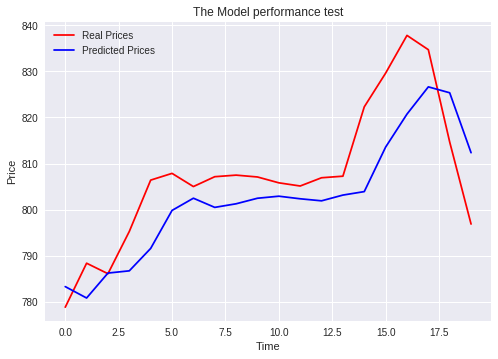

In [39]:
#Visualizing the results
plt.plot(real,color='red',label= "Real Prices")
plt.plot(pred_stock,color='blue',label= "Predicted Prices")
plt.title("The Model performance test")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

